In [111]:
from transformation import *
from FarFieldTransfer import E_field
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# from BeamSim import Beam_pattern

alignment_x = np.array([1.0, 0, 0.])
alignment_z = np.array([0., 0., 1.])
antenna_latitude = np.pi/8

path = "/Users/zhengzhang/PythonProjects/TIBEC/REACH_Efield.txt"
antenna_sph_coords = np.loadtxt(path,
                                comments=('// >>', '73 37', '#'),
                                usecols=(0, 1),
                                max_rows=73 * 37, ).reshape(-1, 2)

antenna_sph_coords = np.deg2rad(antenna_sph_coords)

e_field = (np.loadtxt(path,
                      comments=('// >>', '73 37'),
                      usecols=(2, 4),
                      ) + 1j * np.loadtxt(path,
                                          comments=('// >>', '73 37'),
                                          usecols=(3, 5),
                                          )).reshape(26, 73, 37, 2)

test = E_field(antenna_sph_coords, e_field, alignment_x, alignment_z, antenna_latitude)


The far-field object has been initialized!


/Users/zhengzhang/anaconda3/envs/TIBEC/lib/python3.10/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


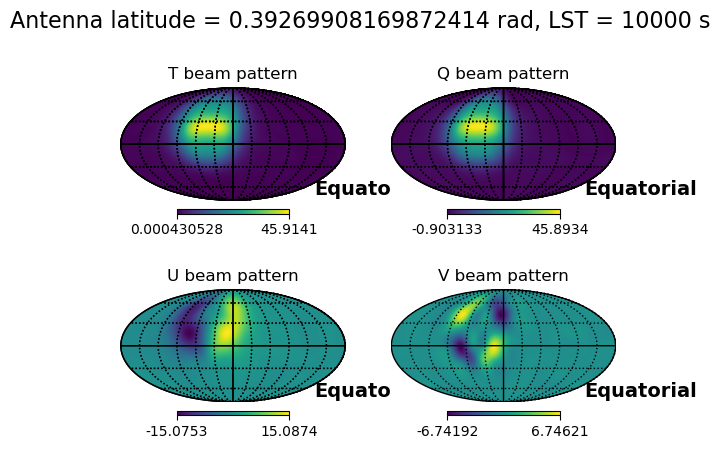

In [118]:

def healpix_map_coordinates(nside):
    npixel = 12 * nside ** 2
    result = np.zeros(shape=(npixel, 2))
    result[:, 1], result[:, 0] = hp.pixelfunc.pix2ang(nside, np.arange(npixel))
    return result


sky_sph_coords = healpix_map_coordinates(128)
LSTs = np.array([10000])
Beam_polarized = test.generate_auto_beam(LSTs, sky_sph_coords, 0)
Beam_integrated = np.mean(Beam_polarized, axis=0)

def plot_beam(ti):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Antenna latitude = {} rad, LST = {} s'.format(antenna_latitude, LSTs[ti]), fontsize=16)
    pols = ["T", "Q", "U", "V"]
    for P in range(4):
        plt.axes(axs.flat[P])
        hp.mollview(Beam_polarized[ti, :, P],
                    title=pols[P]+" beam pattern",
                    coord='C',
                    flip='astro',
                    # rot=(0, 90, 0),
                    hold=True)
        hp.visufunc.graticule(coord='C')
        fig.savefig("./beam_pattern_REACH_dipole.png")
plot_beam(0)